# Multi-label classification with tensorflow : Identifying irrigation targets based on sensor data

### Exploratory Data Analysis


We're going to automate the watering of farm parcels by making an intelligent irrigation machine. Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes/labels are not mutually exclusive, We could water all, none or any combination of farm parcels based on the inputs.

To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a sigmoid activation function. This makes each neuron in the output layer able to output a number between 0 and 1 independently.

It's time to build an intelligent irrigation machine! But first, let;s explore the dataset

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("irrigation_machine.csv")
data = data.iloc[:,1:]
print(data.shape)
data.head()

(2000, 23)


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


This dataset has 20 features and 3 targets. It is hard to visualize using 2D graphs. For now, let us just use sensor 18 and sensor 19 features and parcel 1 target feature to see what the dataset looks like. With 20 sensors the whole thing appears really complex and deep learning is an excellent choice in this case.

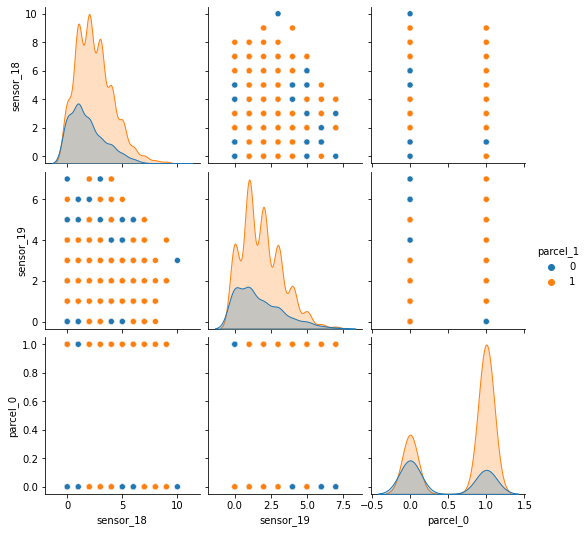

In [2]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Use pairplot and set the hue to be our class column
sns.pairplot(data.iloc[:,18:22], hue='parcel_1') 

# Show the plot
plt.show()



### Building a simple model


We will first build a very simple model consisting of 2 layers. We will use sigmoid activation function instead of softmax. Softmax will distribute the probabilities among all possible classes so that the sum of the probabilities of each row is 1. However, since we are using multi-level classification, using sigmoid to predict probabilities of each individual class is the most reasonable choice.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, activation='relu', input_shape=(20,)))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Create a new model for later usage
new_model = tf.keras.Sequential(model.layers)
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


An output of your multi-label model could look like this: [0.76 , 0.99 , 0.66 ]. If we round up probabilities higher than 0.5, this observation will be classified as containing all 3 possible labels [1,1,1]. For this particular problem, this would mean watering all 3 parcels in the farm is the right thing to do, according to the network, given the input sensor measurements.

Now, we will take the dataset and split it into training and testing set. We will train the model with training set. Later, we will test the dataset with the testing set.



In [5]:
from sklearn.model_selection import train_test_split

sensors = data.iloc[:,:20]
parcels = data.iloc[:,20:]

sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, random_state=104,test_size=0.25, shuffle=True)

print(sensors_train.shape)
print(parcels_train.shape)
print(sensors_test.shape)
print(parcels_test.shape)


(1500, 20)
(1500, 3)
(500, 20)
(500, 3)


In [6]:
# Train for 100 epochs using a validation split of 0.2
h_callback = model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)



Epoch 1/100
38/38 [==============================] - 0s 7ms/step - loss: 0.6161 - accuracy: 0.4625 - val_loss: 0.4918 - val_accuracy: 0.6167
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.6283 - val_loss: 0.3956 - val_accuracy: 0.6500
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.6308 - val_loss: 0.3382 - val_accuracy: 0.6567
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.6333 - val_loss: 0.3117 - val_accuracy: 0.6667
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.6325 - val_loss: 0.2915 - val_accuracy: 0.6367
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.6333 - val_loss: 0.2862 - val_accuracy: 0.6833
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.6308 - val_loss: 0.2762 - val_accuracy: 0.7167
Epoch 8/100
3

In [7]:
# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

16/16 [==============================] - 0s 686us/step - loss: 0.2632 - accuracy: 0.6240
Accuracy: 0.6240000128746033


### Visualizing Model Performance

We can visualize the performance of the model through plotting the training loss and accuracy against validation loss and accuracy which is available in history callbacks. History callback is returned by default every time we train a model with the `.fit()` method. To access these metrics we can access the history dictionary parameter inside the returned `h_callback` object with the corresponding keys.



In [8]:
print(h_callback.params)
print(h_callback.history.keys())

{'verbose': 1, 'epochs': 100, 'steps': 38}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


We will create two helper functions for this task and plot the results stored in history with `plot_accuracy()` and `plot_loss()`, two simple matplotlib functions. The task of `plot_accuracy()` is to plot training loss against validation loss. On the other hand, the task of `plot_loss()` is to plot training accuracy against validation accuracy.


In [9]:
def plot_loss(loss,val_loss):
  # Plot training & validation loss values
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Now let us use these helper functions along with history callback object to produce the desired graph

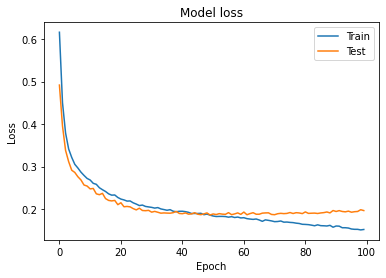

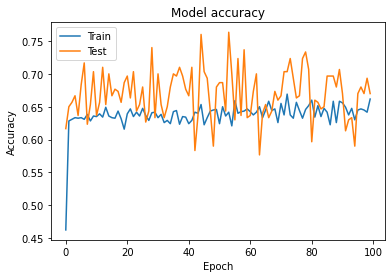

In [10]:

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

### Saving the model with combination of callbacks


We can see that sometimes the model is over-trained that leads to overfitting. We will use the `EarlyStopping()` callback which is useful since it allows us to stop the model training if it no longer improves after a given number of epochs. 

Also, Deep learning models can take a long time to train, especially when we move to deeper architectures and bigger datasets. Saving the model every time it improves as well as stopping it when it no longer does allows us to worry less about choosing the number of epochs to train for. We can also restore a saved model anytime and resume training where we left it. We can use `ModelCheckpoint()` for that.

To make use of these, we need to pass the callbacks inside a list to the model's callback parameter in the `fit()`method.

In [11]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

X_train, X_test, y_train, y_test = sensors_train, sensors_test, parcels_train, parcels_test
# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)

# Save the best model 
model_checkpoint = ModelCheckpoint('best_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = new_model.fit(X_train, y_train,
                    epochs = 10000,
                    callbacks = [monitor_val_acc, model_checkpoint],
                    # validation_data = (X_test, y_test),
                    validation_split = 0.2)

Epoch 1/10000
38/38 [==============================] - 0s 5ms/step - loss: 0.1537 - accuracy: 0.6433 - val_loss: 0.1935 - val_accuracy: 0.7067
Epoch 2/10000
38/38 [==============================] - 0s 1ms/step - loss: 0.1491 - accuracy: 0.6375 - val_loss: 0.1955 - val_accuracy: 0.6300
Epoch 3/10000
38/38 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.6408 - val_loss: 0.1953 - val_accuracy: 0.6033
Epoch 4/10000
38/38 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.6567 - val_loss: 0.1971 - val_accuracy: 0.6400


Let us again visualize the model performance through `plot_accuracy()` and `plot_loss()` helper functions


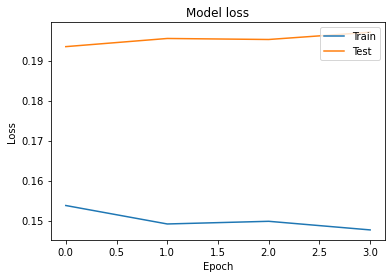

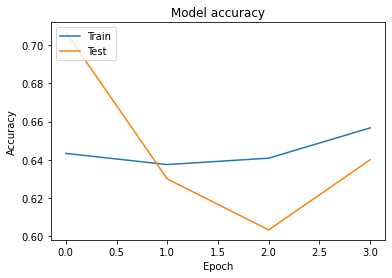

In [12]:

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

In [13]:
# Evaluate your model's accuracy on the test data
accuracy = new_model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

16/16 [==============================] - 0s 1ms/step - loss: 0.2634 - accuracy: 0.5920
Accuracy: 0.5920000076293945
